# How to use

## Instructions

Qiskit's tableau simulations can be initialized from a Clifford circuit ```qc``` created with ```QuantumCircuit``` just by using the class Clifford as:
```
Clifford(qc)
```
Similarly, after importing our functions from ```stabilizers.py```, we can use the class gen_clifford:
```
stab_TN = gen_clifford(qc)
```
And we can later add non-Clifford gates ```qc_nonC``` to the circuit with our version of the method ```compose```:
```
stab_TN.compose(qc_nonC)
```
Since the initialization of the gen_clifford class goes through Qiskit's internal checks, it's better to do the initalization with a Clifford circuit (such as an empty circuit) and add the rest of the gates (Clifford or non-Clifford) with ```compose```. This offers no computational disadvantage to initializing directly. For example:
```
qc = QuantumCircuit(n_qubits)
qc = function_that_adds_all_gates(qc)
stab_TN = gen_clifford(QuantumCircuit(n_qubits)).compose(qc)
```
Measurements of qubits on a Qiskit circuit can be used without issues. In addition, one can measure an observable (as long as the amount of qubits fits the circuit) directly with the method ```measure_obs```
```
ev_check = 'IZZIXIY'
stab_TN.measure_obs(ev_check) 
```

### Toy model

#### Clifford class

In [1]:
# Qiskit's Clifford class (see https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Clifford) can be used as follows (adapted from the same reference)
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford
from qiskit.circuit.library import ZGate

# Create a circuit
qc = QuantumCircuit(2)

# Add only Clifford gates
# For example, these states generate the bell state, which is a stabilizer state
qc.h(0)
qc.cx(0, 1)

# Initialize the Clifford class with the circuit
cliff = Clifford(qc)

# This class stores a tableau equivalent to the clifford circuit. It returns:
print(cliff)
# You can also print only the destabilizer rows...
print(cliff.to_labels(mode="D"))
# or the stabilizer rows.
print(cliff.to_labels(mode="S"))

Clifford: Stabilizer = ['+XX', '+ZZ'], Destabilizer = ['+IZ', '+XI']
['+IZ', '+XI']
['+XX', '+ZZ']


In [2]:
# It also admits initialization with tableaus (which you can extract from a different Clifford object...
cliff_tableau = Clifford(cliff)
print('Clifford from tableau')
print(cliff_tableau)

Clifford from tableau
Clifford: Stabilizer = ['+XX', '+ZZ'], Destabilizer = ['+IZ', '+XI']


In [3]:
# or construct yourself.
tableau = [[0,0,1,0,0],[0,1,0,0,0],[1,1,0,0,0,],[0,0,1,1,0,]]
cliff_diy = Clifford(tableau)
print('Clifford do-it-yourself')
print(cliff_diy)

Clifford do-it-yourself
Clifford: Stabilizer = ['+XX', '+ZZ'], Destabilizer = ['+IZ', '+XI']


In [4]:
# One can add further gates to the circuit in Clifford afterwards with compose, using the gates themselves...
cliff = cliff.compose(ZGate(),[0])
print('Clifford after adding gate')
print(cliff)

Clifford after adding gate
Clifford: Stabilizer = ['-XX', '+ZZ'], Destabilizer = ['+IZ', '+XI']


In [5]:
# or entire new circuits
new_circ = QuantumCircuit(2)
new_circ.z([1])
cliff = cliff.compose(new_circ)
print('Clifford after adding circuit')
print(cliff)

Clifford after adding circuit
Clifford: Stabilizer = ['+XX', '+ZZ'], Destabilizer = ['+IZ', '-XI']


In [6]:
# Beware that the modification does not happen in place! Without keeping the return we don't change the object
cliff.compose(ZGate(),[0])
print('We did not save the modification, so instead of undoing the previous gate, this clifford is the same as above')
print(cliff)
# This is different for our gen_clifford class below. Modifications with compose happen in place because it's the main way in which we process a circuit

We did not save the modification, so instead of undoing the previous gate, this clifford is the same as above
Clifford: Stabilizer = ['+XX', '+ZZ'], Destabilizer = ['+IZ', '-XI']


#### Generalized Clifford class

In [1]:
# We adapt the class to accept non-clifford transformations into gen_clifford in stabilizers.py
from stabilizers import *
from qiskit.circuit.library import RZGate, HGate, CXGate

# We can initialize in the same way
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
# but with gen_clifford
gcliff = gen_clifford(qc)

# This class also stores a tableau and it can be accessed in the same way as with Clifford class
print(gcliff)
# But now in "xvec" it also has a tensor network in MPS form to keep the coefficients of a superposition of stabilizer states
print(gcliff.xvec)

c:\Users\Sergi\miniconda3\envs\stab\Lib\site-packages\cotengra\hyperoptimizers\hyper.py:57: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(
c:\Users\Sergi\miniconda3\envs\stab\Lib\site-packages\cotengra\hyperoptimizers\hyper.py:39: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(
c:\Users\Sergi\miniconda3\envs\stab\Lib\site-packages\cotengra\hyperoptimizers\hyper.py:76: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


To keep the public release lightweight, we did not upload the 3 qubit clifford matrices. If needed, get in contact with the author.
Clifford: Stabilizer = ['+XX', '+ZZ'], Destabilizer = ['+IZ', '+XI']
MatrixProductState([
    Tensor(shape=(1, 2), inds=('_25ec6aAAAAB', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(1, 2), inds=('_25ec6aAAAAB', 'k1'), tags=oset(['I1'])),
], tensors=2, indices=3, L=2, max_bond=1)


In [2]:
# It admits the same initialization as Clifford.
# In fact, to keep the same __init__ procedure, we initialize always with clifford circuits and add non-clifford circuits later with compose. We can do so easily with an empty circuit.
stabTN = gen_clifford(QuantumCircuit(3), disentangle=False)

# Now we can add as many gates as we want, clifford or non-clifford, although the bond dimension of xvec might grow.
# Non-clifford gates modify xvec, stored in MPS form
stabTN.compose(RZGate(np.pi/8),[0])
stabTN.compose(RZGate(np.pi/8),[1])
stabTN.compose(RZGate(np.pi/8),[2])
print(stabTN.xvec)

# While Clifford gates modify the tableau
stabTN.compose(HGate(),[0])
stabTN.compose(CXGate(),[0,1])
stabTN.compose(CXGate(),[0,2])
print(stabTN)

MatrixProductState([
    Tensor(shape=(1, 2), inds=('_25ec6aAAAAD', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(1, 1, 2), inds=('_25ec6aAAAAD', '_25ec6aAAAAE', 'k1'), tags=oset(['I1']), left_inds=('_25ec6aAAAAE', 'k1')),
    Tensor(shape=(1, 2), inds=('_25ec6aAAAAE', 'k2'), tags=oset(['I2']), left_inds=('k2',)),
], tensors=3, indices=5, L=3, max_bond=1)
Clifford: Stabilizer = ['+IIZ', '+IXI', '+XII'], Destabilizer = ['+XXX', '+IZZ', '+ZIZ']


c:\Users\Sergi\miniconda3\envs\stab\Lib\site-packages\quimb\gen\operators.py:198: ComplexWarning: Casting complex values to real discards the imaginary part
  R = math.cos(phi / 2) * pauli('I') - 1.0j * math.sin(phi / 2) * pauli(xyz)


In [3]:
# Notice that some local gates after the tableau is non-trivial increase entanglement in the MPS
print(f"Current bond dimension is {stabTN.xvec.max_bond()}")
stabTN.compose(RZGate(np.pi/8),[2])
print(f"After a T gate, bond dimension is {stabTN.xvec.max_bond()}")

Current bond dimension is 1
After a T gate, bond dimension is 2


In [4]:
# If we want to limit it, we can use the following method
stabTN.reduce_bond_dim(max_bond=1)
print(f"Current bond dimension is {stabTN.xvec.max_bond()}")
# bond_dim is None by default, in which case quimb does not truncate

Current bond dimension is 1


In [5]:
# We can also initialize it from the start so that it is kept during all the process
stabTN = gen_clifford(QuantumCircuit(3), max_bond=1, disentangle=False)

# We apply the same gates as before
stabTN.compose(RZGate(np.pi/8),[0])
stabTN.compose(RZGate(np.pi/8),[1])
stabTN.compose(RZGate(np.pi/8),[2])
stabTN.compose(HGate(),[0])
stabTN.compose(CXGate(),[0,1])
stabTN.compose(CXGate(),[0,2])
stabTN.compose(RZGate(np.pi/8),[2])

# And the bond dimension never raised to 2
print(f"Current bond dimension is {stabTN.xvec.max_bond()}")

Current bond dimension is 1


In [6]:
# We can also compose with a circuit like before
qc = QuantumCircuit(3)
qc.rx(np.pi/8,[0])
qc.cx(0,1)
qc.cx(0,2)
stabTN_circ = gen_clifford(QuantumCircuit(3), disentangle=False).compose(qc)
# With the same results
print(stabTN_circ.xvec)
print(stabTN_circ)

MatrixProductState([
    Tensor(shape=(1, 2), inds=('_25ec6aAAABD', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(1, 1, 2), inds=('_25ec6aAAABD', '_25ec6aAAABE', 'k1'), tags=oset(['I1']), left_inds=('_25ec6aAAABE', 'k1')),
    Tensor(shape=(1, 2), inds=('_25ec6aAAABE', 'k2'), tags=oset(['I2']), left_inds=('k2',)),
], tensors=3, indices=5, L=3, max_bond=1)
Clifford: Stabilizer = ['+IIZ', '+IZZ', '+ZIZ'], Destabilizer = ['+XXX', '+IXI', '+XII']


In [7]:
# At the end we can measure without projection (if we want to measure non-commuting observables without losing the state we prepared)
print(stabTN_circ.measure('ZII'))
# We can give a tag if we want to remember this measurement with a specific name
print(stabTN_circ.measure('IZI', tag='middle Z'))
# Otherwise it's just stored as the pauli string and a number n for being the nth measurement in the computation
print(stabTN_circ.measure('IIZ'))

{'reg': 0, 'stats': ((0.9619397662556434+0j), (0.03806023374435663+0j)), 'ev': (0.9238795325112867+0j)}
{'reg': 0, 'stats': ((0.9619397662556434+0j), (0.03806023374435663+0j)), 'ev': (0.9238795325112867+0j)}
{'reg': 1, 'stats': ((0.9619397662556434+0j), (0.03806023374435663+0j)), 'ev': (0.9238795325112867+0j)}


In [8]:
# And also with projection (if we want to continue processing a circuit realistically after the measurement)
print(stabTN_circ.measure('IXI',project=True))
# After the projection, the EV changes and the outcome is fixed
print('Observable IXI after the measurement:')
print(stabTN_circ.measure('IXI'))

Projecting state onto measured observable
{'reg': 1, 'stats': ((0.5+0j), (0.5+0j)), 'ev': 0j}
Observable IXI after the measurement:
{'reg': 1, 'stats': (0j, (1+0j)), 'ev': (-1+0j)}


In [9]:
# In both cases the expected value is calculated first and the result is sampled accordingly. The results are stored in .results
stabTN_circ.results

{'ZII_0': {'reg': 0,
  'stats': ((0.9619397662556434+0j), (0.03806023374435663+0j)),
  'ev': (0.9238795325112867+0j)},
 'middle Z': {'reg': 0,
  'stats': ((0.9619397662556434+0j), (0.03806023374435663+0j)),
  'ev': (0.9238795325112867+0j)},
 'IIZ_2': {'reg': 1,
  'stats': ((0.9619397662556434+0j), (0.03806023374435663+0j)),
  'ev': (0.9238795325112867+0j)},
 'IXI_3': {'reg': 1, 'stats': ((0.5+0j), (0.5+0j)), 'ev': 0j},
 'IXI_4': {'reg': 1, 'stats': (0j, (1+0j)), 'ev': (-1+0j)}}

### Other methods

#### Disentangling

In [10]:
'''
We implemented a few disentangling methods (uses "exact" by default)
    - Exact: Rearrange the rotation applied to the MPS (after commuting with the clifford circuit) so it doesn't entangle at all if there's an unused stabilizer state in Xvec. Works up to #n T-gates almost always.
            See also: apply_xvec_rotation
            Follows: arxiv:2412.17209
    - Heuristic (3): Sweep Xvec to look for disentangling operations by trying all possible 2 (3) clifford entangling gates (Expensive with 2, extremely expensive with 3) 
            See also: automatic_disentangle, reduce_entanglement
            Follows: arxiv:2407.01692
    - Exact+heuristic: Use both methods above. Statistically, heuristic does not kick in until after #n T-gates. (Less expensive than Heuristic due to less burden in the first gates)
'''

# This can be setup as an argument when beginning the computation:

# Prepare a circuit that is entangled and not clifford
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.rz(np.pi/4,1)
# qc.rz(np.pi/4,2)

# Let's run a version without disentangling
stabTN_ent = gen_clifford(QuantumCircuit(3), disentangle=False)
stabTN_ent.compose(qc)
print(f"stabTN_ent has bond dim={stabTN_ent.xvec.max_bond()}")

# Compared to a version with disentangling methods
stabTN = gen_clifford(QuantumCircuit(3), disentangle='exact+heuristic')
stabTN.compose(qc)
stabTN.xvec.max_bond()
print(f"stabTN has bond dim={stabTN.xvec.max_bond()}")

stabTN_ent has bond dim=2


stabTN has bond dim=1


In [11]:
# We can also call the heuristic method 
stabTN_ent.automatic_disentangle()
print(f"stabTN_ent now has bond dim={stabTN_ent.xvec.max_bond()}")

# Notice that if "heuristic" is activated, the method is called after each gate (unless it's already disentangled)
# By disabling it and calling the method above manually, one can disentangle only after the gates they want

stabTN_ent now has bond dim=1


#### Converting to full MPS (with trivial tableau)

In [16]:
# We can transform the tableau into Clifford gates with Qiskit's methods and absorb them one by one into the MPS with
stabTN.compress_clifford(inplace=True)
# If we only want to check the result, the default method "inplace=False" returns a copy with the compression and leaves the original unchanged

# Notice how it regained the entanglement that we had extracted
stabTN.xvec

MatrixProductState(tensors=3, indices=5, L=3, max_bond=2)

In [17]:
# This also resets the tableau
print(stabTN)


Clifford: Stabilizer = ['+IIZ', '+IZI', '+ZII'], Destabilizer = ['+IIX', '+IXI', '+XII']


In [18]:
# Running automatic_disentangle is usually able to extract most of the entanglement again into the tableau
stabTN.automatic_disentangle()
print(stabTN)
print(stabTN.xvec)

Clifford: Stabilizer = ['+IXI', '+XII', '-XXY'], Destabilizer = ['-IZZ', '-ZIZ', '+IIZ']
MatrixProductState([
    Tensor(shape=(1, 2), inds=('_25ec6aAAABp', 'k0'), tags=oset(['I0', 'PSI0', 'GATE_0', 'S', 'GATE_6', 'SDG', 'GATE_7', 'H', 'Z', 'GATE_1', 'GATE_2', 'GATE_21', 'GATE_22', 'GATE_26', 'GATE_27']), left_inds=('k0',)),
    Tensor(shape=(1, 1, 2), inds=('_25ec6aAAABp', '_25ec6aAAABq', 'k1'), tags=oset(['I1', 'PSI0', 'GATE_1', 'SDG', 'GATE_2', 'H', 'GATE_4', 'GATE_5', 'S', 'GATE_3', 'Z', 'GATE_11', 'GATE_12', 'GATE_16', 'GATE_17', 'GATE_19', 'GATE_20', 'GATE_24', 'GATE_25'])),
    Tensor(shape=(1, 2), inds=('_25ec6aAAABq', 'k2'), tags=oset(['I2', 'PSI0', 'GATE_6', 'H', 'GATE_7', 'S', 'GATE_9', 'SDG', 'GATE_10', 'GATE_14', 'GATE_15']), left_inds=('k2',)),
], tensors=3, indices=5, L=3, max_bond=1)


## Speed test

Test speed of computation on a Clifford circuit
If this goes as fast as Qiskit, then the sTN layer is not interfering

In [ ]:
ev_checks = {
    'z_min': 'I'*(62) + 'Z' + 'I'*(127-63),
}

mode = 'tn'
max_bond = 128
trotter_steps_list = [5,10,20,100]
rot_angles = [np.pi/2] # this makes it a clifford circuit
gate_count = 0
results_trotter = {}

max_qubits = 127
qc_0 = QuantumCircuit(max_qubits,33)

cx_instructions = connectivity_kyiv()

for trotter_steps in trotter_steps_list:
    print(f"For {trotter_steps}:")
    for rot_angle in rot_angles:
        print(rot_angle)
        start = time()
        qc = QuantumCircuit(max_qubits,32)
        for _ in range(trotter_steps):
            for qb in range(qc.num_qubits):
                gate_count += 1
                qc.rx(rot_angle,qb)
            for conn in cx_instructions:
                if conn[0]>=max_qubits or conn[1]>=max_qubits:
                    print('skipped one')
                    continue
                qc.rzz(-np.pi/2,conn[0],conn[1])
                gate_count += 1

        for ev in ev_checks:
            print('Creating and composing...')
            test_temp = gen_clifford(qc_0,mode=mode,max_bond=max_bond).compose(qc)
            print('Measuring...')
            test_temp.measure_obs(ev_checks[ev])  

            for t in test_temp.results:
                print(t)
                print(test_temp.results[t])
        total_time = time() - start
        results_trotter[gate_count] = total_time
        print(f"Gate count={gate_count}")
        print(f"It took {total_time} s")

For 5:
1.5707963267948966
Creating and composing...
Measuring...
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
{'reg': 0, 'stats': ((0.5+0j), (0.5+0j)), 'ev': (-0+0j)}
Gate count=1355
It took 1.1561884880065918 s
For 10:
1.5707963267948966
Creating and composing...
Measuring...
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
{'reg': 1, 'stats': ((0.5+0j), (0.5+0j)), 'ev': (-0+0j)}
Gate count=4065
It took 3.2951831817626953 s
For 20:
1.5707963267948966
Creating and composing...
Measuring...
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
{'reg': 0, 'stats': ((0.5+0j), (0.5+0j)), 'ev': 0j}
Gate count=9485
It took 5.462470769882202 s
For 100:
1.5707963267948966
Creating and composing...
Measuring...
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [ ]:
from matplotlib import pyplot as plt

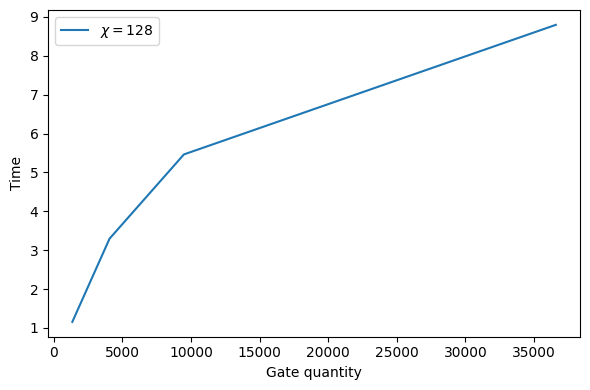

In [ ]:
plt.figure(figsize=(6,4))
res = results_trotter
plt.plot([k for k in res], [res[k] for k in res], label=f"$\chi={max_bond}$")
plt.ylabel("Time")
plt.xlabel("Gate quantity")
plt.legend()
plt.tight_layout()
plt.show()

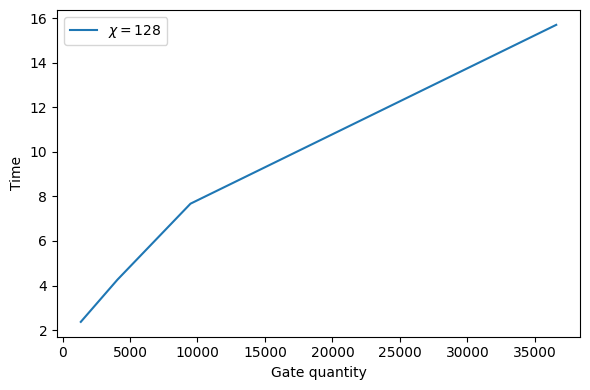

In [ ]:
plt.figure(figsize=(6,4))
res = results_trotter
plt.plot([k for k in res], [res[k] for k in res], label=f"$\chi={max_bond}$")
plt.ylabel("Time")
plt.xlabel("Gate quantity")
plt.legend()
plt.tight_layout()
plt.show()

The computation shouldn't get harder as we add more qubits

In [ ]:
mode = 'tn'
max_bond = 128
trotter_steps = 5
rot_angles = [np.pi/2] # this makes it a clifford circuit
gate_count = 0
results_qbs = {}

max_qubits_list = [16,32,48,64,80,96,112,127]
qc_0 = QuantumCircuit(max_qubits,33)

cx_instructions = connectivity_kyiv()

for max_qubits in max_qubits_list:
    ev_checks = {
        'z_min': 'I'*(max_qubits//2) + 'Z' + 'I'*(max_qubits-(max_qubits//2+1)),
    }

    print(f"For {max_qubits}:")
    for rot_angle in rot_angles:
        start = time()
        qc = QuantumCircuit(max_qubits,32)
        for _ in range(trotter_steps):
            for qb in range(qc.num_qubits):
                gate_count += 1
                qc.rx(rot_angle,qb)
            for conn in cx_instructions:
                if conn[0]>=max_qubits or conn[1]>=max_qubits:
                    # print('skipped one')
                    continue
                qc.rzz(-np.pi/2,conn[0],conn[1])
                gate_count += 1

        for ev in ev_checks:
            print('Creating and composing...')
            test_temp = gen_clifford(qc_0,mode=mode,max_bond=max_bond).compose(qc)
            print('Measuring...')
            test_temp.measure_obs(ev_checks[ev])  

            for t in test_temp.results:
                print(t)
                print(test_temp.results[t])
        total_time = time() - start
        results_qbs[gate_count] = total_time
        print(f"Gate count={max_qubits}")
        print(f"It took {total_time} s")

For 16:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=16
It took 0.05086398124694824 s
For 32:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=32
It took 0.04092907905578613 s
For 48:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=48
It took 0.05883479118347168 s
For 64:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=64
It took 0.07576704025268555 s
For 80:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=80
It took 0.2982032299041748 s
For 96:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=96
It took 0.11372208595275879 s
For 112:
Creating and composing...
Measuring...
Did not recognize format of observable to measure
Gate count=112
It took 0.1396021842956543 s
For 127:
Crea

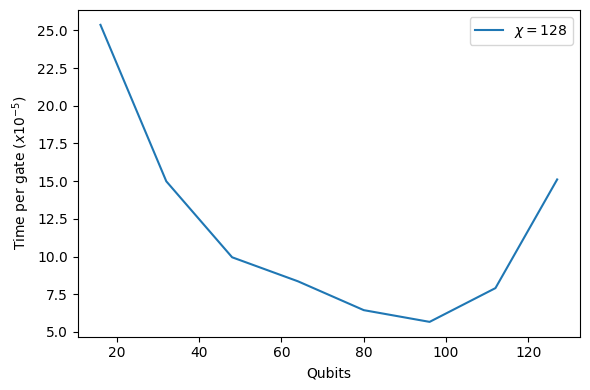

In [ ]:
plt.figure(figsize=(6,4))
max_qubits_list = [16,32,48,64,80,96,112,127]
res = results_qbs
plt.plot([max_qubits_list[i] for i,_ in enumerate(res)], [10**5 * res[k]/k for k in res], label=f"$\chi={128}$")
plt.ylabel("Time per gate ($x 10^{-5}$)")
plt.xlabel("Qubits")
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
# Big non-stabilizer test Uncontracted (TN FAST) !!!!!!!!!!!!!!
max_qubits = 127
ev_checks = {
    # 'xyz_l' : 'I'*37 + 'XZIZXZ' + 'I'*(52-43) + 'XIIIXXXIIIXZ' + 'I'*(72-64) + 'ZIIYIIIXZ' + 'I'*(90-81) + 'ZZ' + 'I'*(127-92),
    # 'z': 'IIZIZIZ' + 'I'*(101-7) + 'ZIZIZ' + 'I'*(127-106),
}

mode = 'tn'
# max_bonds = [2**i for i in range(1,12)] # current trial
max_bonds = [2**i for i in range(4,)] # target if performance allows it
# max_bonds = [None]
results = []
trotter_steps = 5
rot_angle = 0.95*np.pi/2 # np.pi/2
compare = True
real = True

if real:
    cx_instructions = connectivity_kyiv()
    ev_checks['xyz_s'] = 'IIIIIIIIZYIIZXIIIZIIIIIIIIIIZXYXZ'+'I'*(max_qubits-33)
else:
    cx_instructions = [[i,i+1] for i in range(max_qubits-1)]
    ev_checks['xyz_s'] = 'IIIIIIIIZYZYZYZYZYZIIIIIIIIIIIIII'+'I'*(max_qubits-33)
    
qc_0 = QuantumCircuit(max_qubits,33)

start = time()
results_real = {}
if compare:
    qc_tn = qtn.Circuit(max_qubits)
    print('Calculating with TN to compare...')
    for _ in range(trotter_steps):
        for qb in range(max_qubits):
            qc_tn.apply_gate('RX', rot_angle, qb)
        for conn in cx_instructions:
            if conn[0]>=max_qubits or conn[1]>=max_qubits:
                # print('skipped one')
                continue
            qc_tn.apply_gate('RZZ', -np.pi/2, conn[0], conn[1])
    
    for ev in ev_checks:
        expec = qu.pauli(ev_checks[ev][0])
        where = [0,]
        for i,ch in enumerate(ev_checks[ev][1:]):
            if ch!='I':
                expec = expec & qu.pauli(ch)
                where.append(i+1)
        print('measuring')
        results_real[ev_checks[ev]] = qc_tn.local_expectation(expec, where=(*where,))
        print(f"TN gave {results_real[ev_checks[ev]]}")
    # print(f"Ended with bond size {max(qc_tn.psi.bond_sizes())}")
qc_tn.psi      

Calculating with TN to compare...
measuring
TN gave (0.9548124788490103-9.915113570674663e-17j)


TensorNetworkGenVector(tensors=2202, indices=2922)

## Average t-gate entanglement (plot in Phys. Rev. Lett. 133, 230601)

This is based on the idea that clifford maps clifford states bijectively. However, clifford gates are not one to one with tableaus. We must solve this first to perform the experiment.

In [1]:
from stabilizers import *
from time import time
import numpy as np

c:\Users\Sergi\miniconda3\envs\stab\Lib\site-packages\cotengra\hyperoptimizers\hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
# Create random cliffords
n_qubits = 40

from scipy import sparse
from qiskit.quantum_info import random_clifford
from random import random

# random_clifford(n_qubits)
# random()

In [36]:
# Big non-stabilizer test
n_qubits = 30

mode = 'tn'
max_bond = None # this should work for not limiting max_bond

tries = 100 # this means how many cliffords for each T-gate
# cx_instructions = connectivity_kyiv()
average = 0
average_inc = 0
samples = []
samples_pre = []

for i in range(tries):
    qc = QuantumCircuit(n_qubits)
    qc.t(int(n_qubits*random())) 
    new_cliff = random_clifford(n_qubits)
    stn = gen_clifford(new_cliff,mode=mode,max_bond=max_bond)
    temp1 = stn.copy()
    res_bond_a = max(stn.xvec.bond_sizes())
    stn.compose(qc)
    temp2 = stn.copy()
    res_bond = max(stn.xvec.bond_sizes())

    # print(f"Obtained bond {res_bond} in trial {i}")
    samples_pre.append(res_bond_a)
    samples.append(res_bond)
    average += res_bond/tries
    average_inc += (res_bond/res_bond_a)/tries

    if (res_bond/res_bond_a)==(max(samples)/samples_pre[np.argmax(samples)]):
        max1 = temp1
        max2 = temp2
    if (res_bond/res_bond_a)==(min(samples)/samples_pre[np.argmin(samples)]):
        min1 = temp1
        min2 = temp2

print(f"Average bond of {tries} tries is: {average}")
print(f"Average increase of {tries} tries is: {average_inc}")
print(f"Max increase of {tries} tries is: {max(samples)/samples_pre[np.argmax(samples)]}")
print(f"Min increase of {tries} tries is: {min(samples)/samples_pre[np.argmin(samples)]}")

Average bond of 100 tries is: 5.520000000000003
Average increase of 100 tries is: 5.520000000000003
Max increase of 100 tries is: 16.0
Min increase of 100 tries is: 2.0


In [4]:
## To calculate amount of clifford circuits given n

def count_clifford_circs(n):

    fact1 = 2**(2*n) # phase combinations
    fact2 = 2**(n**2) # Sp(2n) elements
    for k in range(1,n+1):
        fact2 *= (4**k - 1)

    return fact1*fact2

### Plots with n

In [ ]:
# Big non-stabilizer test
min_qubits = 2
max_qubits = 50
qubit_list = range(min_qubits,max_qubits)

mode = 'tn'
max_bond = None # this should work for not limiting max_bond

# try_func = lambda x: x**2 + 100*int(x/10) # how many tries we should do for a given n
try_func = lambda x: x # how many tries we should do for a given n

samples = [[0],[0],]
averages = [0,]*(len(qubit_list)+2)
average_incs = [0,]*(len(qubit_list)+2)
cliff_circuits = [0,0]

for n_qubits in qubit_list:
    samples.append([])
    samples_pre = []
    print(f"For {n_qubits} qubits")
    tries = try_func(n_qubits)
    average = 0
    average_inc = 0
    for i in range(tries):
        qc = QuantumCircuit(n_qubits)
        qc.t(int(n_qubits*random())) 
        new_cliff = random_clifford(n_qubits)
        test = gen_clifford(new_cliff,mode=mode,max_bond=max_bond)
        res_bond_a = max(test.xvec.bond_sizes())
        test.compose(qc)
        res_bond = max(test.xvec.bond_sizes())

        samples_pre.append(res_bond_a)
        samples[-1].append(res_bond)
        
        average += res_bond/tries
        average_inc += (res_bond/res_bond_a)/tries
        
    averages[n_qubits] = average
    average_incs[n_qubits] = average_inc
    # cliff_circuits.append(count_clifford_circs(n_qubits))

    print(f"Average bond of {tries} tries is: {average}")
    print(f"Average increase of {tries} tries is: {average_inc}")
    # print(f"Amount of possible Cliffords is: {cliff_circuits[-1]}")
    print(f"Max increase of {tries} tries is: {max(samples[-1])/samples_pre[np.argmax(samples[-1])]}")
    print(f"Min increase of {tries} tries is: {min(samples[-1])/samples_pre[np.argmin(samples[-1])]}")

In [7]:
from matplotlib import pyplot as plt

[Decimal('24'), Decimal('11520'), Decimal('92897280'), Decimal('12128668876800'), Decimal('25410822678459187200'), Decimal('852437556169034724016128000'), Decimal('4.576209955296803515123703816E+35'), Decimal('3.930874438226752547895796428E+45'), Decimal('5.402532081094233125882679856E+56'), Decimal('1.188028235526100326803818368E+69'), Decimal('4.180001752488569306571225047E+82'), Decimal('2.353131651606858058757448268E+97'), Decimal('2.119512534282874757335140730E+113'), Decimal('3.054539463694057850608873081E+130'), Decimal('7.043288462166715668751101221E+148'), Decimal('2.598514793373000602187899570E+168'), Decimal('1.533892395593915676593455267E+189'), Decimal('1.448720407435185154327536371E+211'), Decimal('2.189244382430811488475569644E+234'), Decimal('5.293268118728968715777985491E+258'), Decimal('2.047733919639343922111618749E+284'), Decimal('1.267485904462095526657936186E+311'), Decimal('1.255257240290759990632775211E+339'), Decimal('1.989034492619258790101944703E+368'), Decim

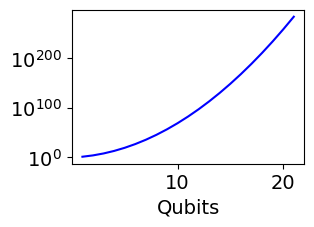

In [48]:
from decimal import *
from matplotlib import pyplot as plt
import numpy as np

def count_clifford_circs_dec(n):

    fact1 = Decimal(2.0)**Decimal(2*n) # phase combinations
    fact2 = Decimal(2.0)**Decimal(n**2) # Sp(2n) elements
    for k in range(1,n+1):
        fact2 *= Decimal(4**k - 1)

    return fact1*fact2

def count_clifford_circs(n):

    fact1 = 2.0**(2*n) # phase combinations
    fact2 = 2.0**(n**2) # Sp(2n) elements
    for k in range(1,n+1):
        fact2 *= (4**k - 1)

    return fact1*fact2

max_qubits = 50
fig = plt.figure(figsize=(3,2))

ax = plt.gca()
xs = range(1,max_qubits)
ys = [count_clifford_circs_dec(n) for n in xs]
print(ys)

# plt.xticks(np.arange(xlim[0], xlim[1]+200, 200))

plt.yscale('log')
plt.yticks([Decimal(1),Decimal(1e100),Decimal(1e200),Decimal(1e300)], size=14)
plt.xticks([10,20], size=14)
plt.plot(xs, ys, color='b')
# plt.plot(x, [test() for n in x], color='b')
plt.xlabel("Qubits", size=14)
# plt.legend()
# plt.tight_layout()
plt.show()

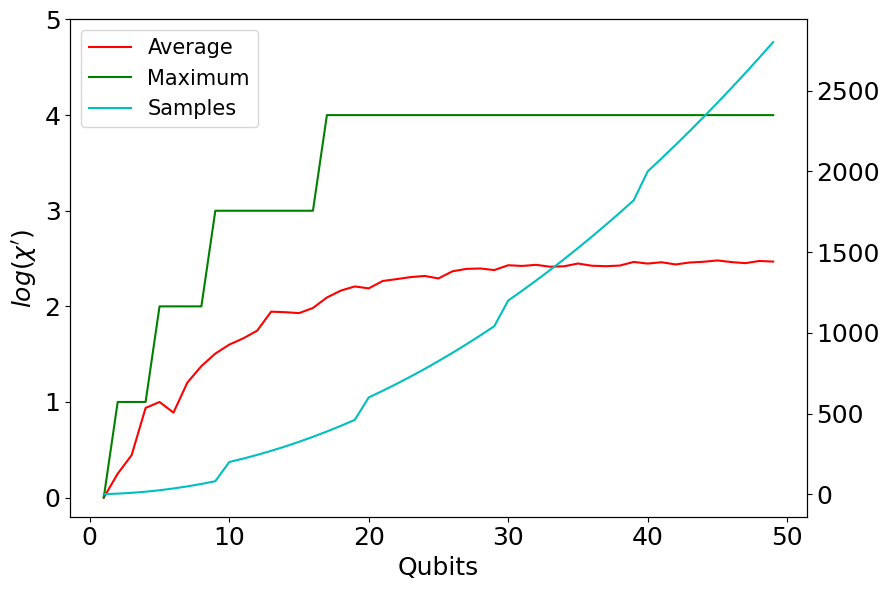

In [41]:
max_qubits = 50
log = True
x = range(1,max_qubits)
try_func = lambda x: x**2 + 100*int(x/10) # how many tries we should do for a given n

fig = plt.figure(figsize=(9,6))
ax1 = plt.gca()
if log:
    lns1 = ax1.plot(x, averages[1:], color='r', label='Average')#, label=f"$\chi={max_bond}$")
    lns2 = ax1.plot(x, [np.log2(max(k+[1])) for k in samples[1:]], color='g', label='Maximum')#, label=f"$\chi={max_bond}$")
    plt.ylabel(r"$log(\chi')$", fontsize='18')
else:
    lns1 = ax1.plot(x, [2**k for k in averages[1:]], label='Average')#, label=f"$\chi={max_bond}$")
    lns2 = ax1.plot(x, [max(k+[1]) for k in samples[1:]], color='g', label='Maximum')#, label=f"$\chi={max_bond}$")
    plt.ylabel(r"$\chi'$", fontsize='18')
plt.xlabel("Qubits", fontsize='18')


ax1 = plt.gca()
ax1.set_yticks([0,1.0,2.0,3,4,5])
plt.yticks(fontsize='18')
plt.xticks(fontsize='18')
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3,3.5,4,4.5,5,5.5,6])
# ax.spines['left'].set_position(('data', 0))
ax2 = ax1.twinx()
lns3 = ax2.plot(x, [try_func(n) for n in x], 'c-', label='Samples')
plt.yticks(fontsize='18')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize='15')
plt.tight_layout()
plt.show()

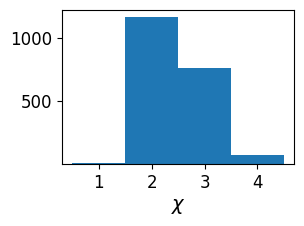

In [24]:
from decimal import *
from matplotlib import pyplot as plt
import numpy as np

qubits = 40
fig = plt.figure(figsize=(3,2))
ax = plt.gca()

# plt.xticks(np.arange(xlim[0], xlim[1]+200, 200))
counts, bins = np.histogram([np.log2(x) for x in samples[qubits]],4,(0.5,4.5))
# plt.stairs(counts, bins, color='b')
plt.hist(bins[:-1], bins, weights=counts)
plt.xticks([1,2,3,4], size=12)
plt.yticks([500,1000], size=12)

# plt.bar(samples[40], color='b')
# plt.plot(x, [test() for n in x], color='b')
plt.xlabel("$\chi$", size=14)
# plt.legend()
# plt.tight_layout()
plt.show()

In [5]:
import pickle

dump = 0 # if True it saves, if False it loads

if dump:
    save_dict = {'samples': samples, 'averages': averages, 'cliff_circuits':cliff_circuits}

    with open(f"data/stab_chi_sim.pickle", 'wb') as handle:
        pickle.dump(save_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(f"data/stab_chi_sim.pickle", 'rb') as handle:
        save_dict = pickle.load(handle)
    samples = save_dict['samples']
    averages = save_dict['averages']
    cliff_circuits = save_dict['cliff_circuits']


## Other example experiments

In [ ]:
from time import time
import numpy as np

As a practical example we can use the circuit from IBM quantum advantage experiment (https://www.nature.com/articles/s41586-023-06096-3) with a reduced amount of qubits

In [ ]:
def apply_ibm_circ(qc,max_qubits,cx_instructions,rot_angle=np.pi/2,trotter_steps=2):
    for _ in range(trotter_steps):
        for qb in range(qc.num_qubits):
            qc.rx(rot_angle,qb)
        for conn in cx_instructions:
            if conn[0]>=max_qubits or conn[1]>=max_qubits:
                continue
            qc.rzz(-np.pi/2,conn[0],conn[1])
    return qc

def apply_ibm_tn(num_qubits,cx_instructions,rot_angle=np.pi/2,trotter_steps=2):
    qc_tn = qtn.Circuit(num_qubits)
    for _ in range(trotter_steps):
        for qb in range(num_qubits):
            qc_tn.apply_gate('RX', rot_angle, qb)
        for conn in cx_instructions:
            if conn[0]>=num_qubits or conn[1]>=num_qubits:
                # print('skipped one')
                continue
            qc_tn.apply_gate('RZZ', -np.pi/2, conn[0], conn[1])
    return qc_tn

### Value close to 0 (EV ~0)

In [ ]:
# Big non-stabilizer test
max_qubits = 15
ev_checks = { f"z{i}" : 'I'*i + 'ZZ' + 'I'*(max_qubits-i-2) for i in range(max_qubits-1)}

mode = 'tn'
# max_bond = 2**16
trotter_steps = 5
rot_angle = 0.95*np.pi/2 # np.pi/2
compare = True

qc_0 = QuantumCircuit(max_qubits)

cx_instructions = connectivity_kyiv()
# cx_instructions = [[i,i+1] for i in range(max_qubits-1)]

# to compare
qc = QuantumCircuit(max_qubits,max_qubits)
qc = apply_ibm_circ(qc,max_qubits,cx_instructions,rot_angle,trotter_steps)

for ev in ev_checks:
    print('Creating and composing...')
    test_temp = gen_clifford(qc_0,mode=mode).compose(qc)
    print('Measuring...')
    test_temp.measure_obs(ev_checks[ev])                                        

    if compare:
        print('Calculating with TN to compare...')
        qc_tn = apply_ibm_tn(max_qubits,cx_instructions,rot_angle,trotter_steps)
        # psi_copy = qc_tn.psi.copy().contract(optimize='random-greedy')
        expec = qu.pauli(ev_checks[ev][0])
        where = [0,]
        for i,ch in enumerate(ev_checks[ev][1:]):
            if ch!='I':
                expec = expec & qu.pauli(ch)
                where.append(i+1)
            # if ch!='I': qc_tn.apply_gate(ch,i)
        # test_temp.results_real = {ev_checks[ev] : psi_copy.conj() @ qc_tn.psi.contract(optimize='random-greedy')}
        test_temp.results_real = {ev_checks[ev] : qc_tn.local_expectation(expec, where=(*where,))}

    for t in test_temp.results:
        print(t)
        print(test_temp.results[t])
        if compare: 
            print(test_temp.results_real[t])

Creating and composing...
Measuring...
Calculating with TN to compare...
ZZIIIIIIIIIIIII
{'reg': 1, 'stats': ((0.5061185129+0j), (0.4938814871+0j)), 'ev': (0.0122370258+0j)}
(0.01223702582620291-3.686287386450715e-17j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IZZIIIIIIIIIIII
{'reg': 1, 'stats': ((0.509047054+0j), (0.490952946+0j)), 'ev': (0.018094108+0j)}
(0.01809410795874398+2.8019849895172255e-17j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IIZZIIIIIIIIIII
{'reg': 1, 'stats': ((0.51201267855+0j), (0.48798732145+0j)), 'ev': (0.0240253571+0j)}
(0.024025357137815843-5.925673092401634e-17j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IIIZZIIIIIIIIII
{'reg': 1, 'stats': ((0.5150155019+0j), (0.4849844981+0j)), 'ev': (0.0300310038-0j)}
(0.030031003770795678-6.694855568032397e-18j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IIIIZZIIIIIIIII
{'reg': 0, 'stats': ((0.515015501

### Value close to 1 (EV ~1)

In [ ]:
# Big non-stabilizer test
max_qubits = 15
ev_checks = { f"z{i}" : 'I'*i + 'ZZ' + 'I'*(max_qubits-i-2) for i in range(max_qubits-1)}

mode = 'tn'
# max_bond = 2**16
trotter_steps = 5
rot_angle = 0.1*np.pi/2 # np.pi/2
compare = True

qc_0 = QuantumCircuit(max_qubits)

cx_instructions = connectivity_kyiv()
# cx_instructions = [[i,i+1] for i in range(max_qubits-1)]

# to compare
qc = QuantumCircuit(max_qubits,max_qubits)
qc = apply_ibm_circ(qc,max_qubits,cx_instructions,rot_angle,trotter_steps)

for ev in ev_checks:
    print('Creating and composing...')
    test_temp = gen_clifford(qc_0,mode=mode).compose(qc)
    print('Measuring...')
    test_temp.measure_obs(ev_checks[ev])                                        

    if compare:
        print('Calculating with TN to compare...')
        qc_tn = apply_ibm_tn(max_qubits,cx_instructions,rot_angle,trotter_steps)
        # psi_copy = qc_tn.psi.copy().contract(optimize='random-greedy')
        expec = qu.pauli(ev_checks[ev][0])
        where = [0,]
        for i,ch in enumerate(ev_checks[ev][1:]):
            if ch!='I':
                expec = expec & qu.pauli(ch)
                where.append(i+1)
            # if ch!='I': qc_tn.apply_gate(ch,i)
        # test_temp.results_real = {ev_checks[ev] : psi_copy.conj() @ qc_tn.psi.contract(optimize='random-greedy')}
        test_temp.results_real = {ev_checks[ev] : qc_tn.local_expectation(expec, where=(*where,))}

    for t in test_temp.results:
        print(t)
        print(test_temp.results[t])
        if compare: 
            print(test_temp.results_real[t])

Creating and composing...
Measuring...
Calculating with TN to compare...
ZZIIIIIIIIIIIII
{'reg': 0, 'stats': (0.9891681701, 0.010831829899999978), 'ev': 0.9783363402}
(0.9783363386042374+1.5800913496982975e-16j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IZZIIIIIIIIIIII
{'reg': 0, 'stats': ((0.98941843565+0j), (0.010581564350000017+0j)), 'ev': (0.9788368713-0j)}
(0.9788368686974653-4.118759484008084e-16j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IIZZIIIIIIIIIII
{'reg': 0, 'stats': ((0.9894046624+0j), (0.010595337599999977+0j)), 'ev': (0.9788093248-0j)}
(0.9788093249754825-1.6762361818411427e-17j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IIIZZIIIIIIIIII
{'reg': 0, 'stats': ((0.98940483995+0j), (0.010595160049999996+0j)), 'ev': (0.9788096799-0j)}
(0.9788096748395853-2.11467320021183e-16j)
Creating and composing...
Measuring...
Calculating with TN to compare...
IIIIZZIIIIIIIII
{'reg': 0, 'stats':

### Value at 1 (EV=1, Stabilizer state)

In [ ]:
# Big non-stabilizer test
max_qubits = 33
ev_checks = {
    # 'xyz_l' : 'I'*37 + 'XZIZXZ' + 'I'*(52-43) + 'XIIIXXXIIIXZ' + 'I'*(72-64) + 'ZIIYIIIXZ' + 'I'*(90-81) + 'ZZ' + 'I'*(127-92),
    # 'z': 'IIZIZIZ' + 'I'*(101-7) + 'ZIZIZ' + 'I'*(127-106),
}

mode = 'tn'
# max_bonds = [2**i for i in range(1,16)] 
max_bonds = [2**2]
results = []
trotter_steps = 5
rot_angle = np.pi/2 # np.pi/2
compare = True
real = True

if real:
    cx_instructions = connectivity_kyiv()
    ev_checks['xyz_s'] = 'IIIIIIIIZYIIZXIIIZIIIIIIIIIIZXYXZ'+'I'*(max_qubits-33)
else:
    cx_instructions = [[i,i+1] for i in range(max_qubits-1)]
    ev_checks['xyz_s'] = 'IIIIIIIIZYZYZYZYZYZIIIIIIIIIIIIII'+'I'*(max_qubits-33)
    
qc_0 = QuantumCircuit(max_qubits,33)

start = time()
results_real = {}
if compare:
    qc_tn = qtn.Circuit(max_qubits)
    print('Calculating with TN to compare...')
    for _ in range(trotter_steps):
        for qb in range(max_qubits):
            qc_tn.apply_gate('RX', rot_angle, qb)
        for conn in cx_instructions:
            if conn[0]>=max_qubits or conn[1]>=max_qubits:
                # print('skipped one')
                continue
            qc_tn.apply_gate('RZZ', -np.pi/2, conn[0], conn[1])
    
    for ev in ev_checks:
        expec = qu.pauli(ev_checks[ev][0])
        where = [0,]
        for i,ch in enumerate(ev_checks[ev][1:]):
            if ch!='I':
                expec = expec & qu.pauli(ch)
                where.append(i+1)
        print('measuring')
        results_real[ev_checks[ev]] = qc_tn.local_expectation(expec, where=(*where,))
print(f"TN calculation took {time()-start}")
start = time()
print('Stab computation starting...')
for max_bond in max_bonds:
    print(f"Using max_bond={max_bond}:")
    qc = QuantumCircuit(max_qubits,33)
    for _ in range(trotter_steps):
        for qb in range(qc.num_qubits):
            qc.rx(rot_angle,qb)
        for conn in cx_instructions:
            if conn[0]>=max_qubits or conn[1]>=max_qubits:
                # print('skipped one')
                continue
            qc.rzz(-np.pi/2,conn[0],conn[1])

    for ev in ev_checks:
        print('Creating and composing...')
        test_temp = gen_clifford(qc_0,mode=mode,max_bond=max_bond).compose(qc)
        print('Measuring...')
        results.append(test_temp.measure_obs(ev_checks[ev]))

        for t in test_temp.results:
            print(t)
            print(test_temp.results[t])
            if compare: 
                print(results_real[t])
    print(f"This bond dim took {time()-start}")   

Calculating with TN to compare...
measuring
TN calculation took 40.406938314437866
Stab computation starting...
Using max_bond=4:
Creating and composing...
Measuring...
IIIIIIIIZYZYZYZYZYZIIIIIIIIIIIIII
{'reg': 0, 'stats': (1.0, 0.0), 'ev': 1.0}
(0.9999999999999738+0j)
This bond dim took 0.07924032211303711
